# Deep Learning Práctica Colab VC02-VC03

### Librerías

In [1]:
import numpy as np
import tensorflow as tf


### Carga del conjunto de datos

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Inspección del conjunto de datos

In [3]:
# Dimensionalidad
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Tipo de etiquetas
print()
print(y_test[0:20])     # Formato categórico

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


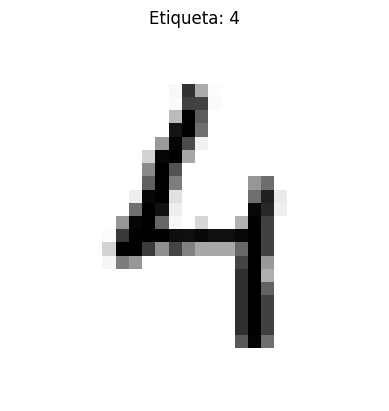

In [4]:
# Visualización de los datos
import matplotlib.pyplot as plt

def display_digit(X_train, y_train, number):
    image = X_train[number, :, :]
    label = y_train[number]
    plt.title("Etiqueta: " + str(label))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.axis("off")
    plt.show()

display_digit(X_train=X_train, y_train=y_train, number=np.random.randint(0, 60000))

### Acondicionamiento del conjunto de datos

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Estandarización de los datos. Al ser imágenes en blanco y negro (0, 255), se estandariza con 255.
X_train_n, X_test_n = X_train/255, X_test/255       # Valores entre 0 y 1.

# Pasar las etiquetas a one-hot-encoding.
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

random_num = np.random.randint(0, 60000)
print(f"\nNúmero {y_train[random_num]}:", y_train_ohe[random_num])

# Partición de los datos: train -> train + validación
X_train_n_tr, X_train_n_val, y_train_ohe_tr, y_train_ohe_val = train_test_split(
    X_train_n, y_train_ohe, test_size=0.15, random_state=42)

print()
print(X_train_n_tr.shape)
print(X_train_n_val.shape)
print(y_train_ohe_tr.shape)
print(y_train_ohe_val.shape)


(60000, 10)
(10000, 10)

Número 0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

(51000, 28, 28)
(9000, 28, 28)
(51000, 10)
(9000, 10)


### Red Neuronal

In [6]:
# Importar constructor y layers (capas)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Crear arquitectura de red
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

c:\Users\pepel\Desktop\Formación\Máster\Contenido\Asignaturas\Redes Neuronales y Deep Learning\GitHub\redneur\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Optimizadores de la red neuronal
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

# Compilación del modelo: especificar función de pérdidas (a minimizar) + optimizador.
lr = 0.005
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=lr),
              metrics=['accuracy'])

(Nota sobre funciones de activación + funciones de pérdida.)

- NOTACIÓN Y PRE-ACTIVACIÓN

y = [0, 0, 0, 1, 0]; c = [0, 1, 2, 3, 4]

Predicción: yhat = [0, 0.1, 0.2, 0.7, 0]

yhat_logit (antes de la activación) = [-10, -23, -23, 10, 1]

- FUNCIONES DE ACTIVACIÓN

Sigmoide: yhat = 1/(1+exp(-yhat_logit_c))

Softmax: yhat = exp(yhat_logit_c)/sum_cc(exp(yhat_logit_c))

- FUNCIONES DE COSTE -> En clasificación se emplea entropía cruzada H(y, yhat)

Categorical Cross Entropy (Requiere que la función de activación sea Softmax):
Hcat = -sum_c(y_c * log(yhat)) -> -1 * log(0.7)

Binary Cross Entropy (En el caso que la función de activación sea Sigmoid):
Hbin = -sum_c(y_c * log(yhat) + (1 - y_c) * log(1-yhat_c))

- ¿Cuándo emplear cada función/activación?

1) Multi-clase [0, 0, 0, 1, 0]

a. Más empleado: softmax + categorical cross_entropy.

b. ¿Se podría emplear sigmoid? Sí, pero se utiliza binary cross_entropy como función de coste.

c. Si utilizamos softmax, ¿se podría utilizar binary_cross_entropy? Sí se puede porque binary_cross_entropy es más general que categorical cross_entropy.
Sin embargo, se hacen operaciones innecesarias, por lo que se recomienda función de activación softmax y función de coste categorical cross_entropy.

2) Mult-etiqueta y=[0, 1, 0, 1, 0] (Menos usual)

a. Sigmoid y Binary Cross Entropy.

b. ¿Se puede utilizar Softmax? No, porque al repartir el valor de las etiquetas entre todos los valores posibles, no alcanzaremos 1 en ninguna etiqueta. Como mucho, podríamos tener [0, 0.5, 0, 0.5, 0].



In [8]:
# Entrenamiento del modelo
print("[INFO] Entrenando red neuronal...")
epochs, batch_size = 50, 150
H = model.fit(X_train_n_tr, y_train_ohe_tr,
              validation_data=(X_train_n_val, y_train_ohe_val),
              epochs=epochs, batch_size=batch_size)

[INFO] Entrenando red neuronal...
Epoch 1/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4426 - loss: 1.9272 - val_accuracy: 0.8017 - val_loss: 1.1017
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8242 - loss: 0.9728 - val_accuracy: 0.8441 - val_loss: 0.7338
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.6884 - val_accuracy: 0.8623 - val_loss: 0.5904
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.5682 - val_accuracy: 0.8734 - val_loss: 0.5153
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.5023 - val_accuracy: 0.8794 - val_loss: 0.4683
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.4546 - val_accuracy: 0.8862 - val_loss: 0.4357
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.4292 - val_accuracy: 0.8904 - val_loss: 0.4122
Epoch 8/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926

### Observar el proceso de entrenamiento para la toma de decisiones

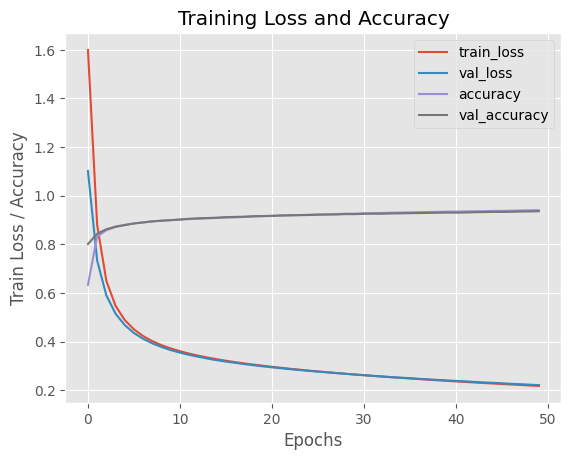

In [9]:
# Visualizar la curva de aprendizaje
def visualize_learning_curve(H):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, len(H.history['loss'])), H.history['loss'], label='train_loss')
    plt.plot(np.arange(0, len(H.history['loss'])), H.history['val_loss'], label='val_loss')
    plt.plot(np.arange(0, len(H.history['loss'])), H.history['accuracy'], label='accuracy')
    plt.plot(np.arange(0, len(H.history['loss'])), H.history['val_accuracy'], label='val_accuracy')
    plt.title('Training Loss and Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss / Accuracy")     # No es recomendable pintar el accuracy y la función de pérdidas en el mismo plot, porque las escalas son distintas.
    plt.legend()
    plt.show()

visualize_learning_curve(H)

In [16]:
# Testeo del modelo
print("[TEST]: Testeando nuestra red...")
yhat_test = model.predict(X_test_n)     # Sólo va a realizar el forward, porque nos proporciona un resultado.

print()
print(yhat_test.shape)
random_label = np.random.randint(0, 10000)
print(f"Etiqueta {y_test[random_label]}: {np.round(yhat_test[random_label, :], 2)}")

[TEST]: Testeando nuestra red...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step

(10000, 10)
Etiqueta 7: [0.   0.   0.   0.01 0.   0.   0.   0.98 0.   0.  ]


In [17]:
# Obtener métricas de testing
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_ohe, -1), np.argmax(yhat_test, -1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.93      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.91      0.91      0.91       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

